# Classification of Medical Data using Machine Learning and NLTK

In [8]:
#Importing Required Libraries for our project
import xml.etree.cElementTree as etree  #handle XML document for parsing
import re   #A regular expression is a special sequence of characters that helps you match or find other strings,using a specialized syntax held in a pattern.
from tqdm import tqdm # for showing the processing of the document with the help of progress bar
import os   #for using operating system dependent functionality.
import nltk # platform to work with human language data
from bs4 import BeautifulSoup  #library for pulling data out of HTML and XML files
from html2text import html2text #Python script that converts a page of HTML into clean and easy-to-read plain ASCII text.
import numpy as np   #used for scientific computing with Python
import matplotlib.pyplot as plt   #Matplotlib is a Python 2D plotting library
import seaborn as sns
%matplotlib notebook 
np.random.seed(7)

In [9]:
#creating function to clean xml document
def clean_html(html):
    """
    Copied from NLTK package.
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    return cleaned.strip()


In [10]:
#Function to load file 

def loadFiles(directory):
    DEBUG =False
    l = []
    for file in os.listdir(directory):  # os.listdir() function (that belongs to the OS module) to search through a given path.
        data = directory + file         # combining 
        if DEBUG : print (data)
        l.append(data)
    l=sorted(l)
    
    return l

In [11]:
#specifying the location of data and storing in the variable

cancer_file_loc = "./Dataset/train/cancer/"
non_cancer_file_loc = "./Dataset/train/noncancer/" 

In [12]:
#Loading cancer and non_cancer data
files_cancer = loadFiles(cancer_file_loc)
files_noncancer = loadFiles(non_cancer_file_loc)

In [13]:
# Reading the cancer data

cancer=[]
for i in tqdm(files_cancer):
    xmlDoc = open(i, 'r')   #opening file in our system
    xmlDocData = xmlDoc.read()#reading file 
    html=xmlDocData        # assigning xmlDocData to html
    cleanhtml = clean_html(html)  #calling clean_html() to clean document/dataset
    text = html2text(cleanhtml) 
    soup = BeautifulSoup(html,"lxml")
    text2 = soup.get_text()    # this method return text part of an entire document or a tag
    cancer.append([text2,'c']) # appending the cleaned text to the cancer data 

100%|██████████| 300/300 [00:55<00:00,  5.43it/s]


In [14]:
#Reading the non_cancer data

noncancer=[]
for i in tqdm(files_noncancer):
    xmlDoc = open(i, 'r')
    xmlDocData = xmlDoc.read()
    html=xmlDocData
    cleanhtml = clean_html(html)
    text = html2text(cleanhtml)
    soup = BeautifulSoup(html,"lxml")
    text2 = soup.get_text()
    noncancer.append([text2,'nc'])

100%|██████████| 150/150 [00:13<00:00, 11.24it/s]


In [15]:
import pandas as pd   #pandas is an open source library easy-to-use data structures and  is used fordata analysis

In [16]:
#Creating Dataframe for cancer and non_cancer with column name text and lable
cnT  = pd.DataFrame(cancer,columns=['text','lable'])
NcnT = pd.DataFrame(noncancer,columns=['text','lable'])

In [17]:
#concatening cancer and non_cancer data

cm = [cnT,NcnT] 
df = pd.concat(cm,ignore_index=True) #Concatenate pandas objects without using index values along the concatenate axis 
df = df.sample(frac=1).reset_index(drop=True)#Do not try to insert index into dataframe columns.This will not resets the index to the default integer index.

In [18]:
#printing first five column labelled text and lable

df.head(5)

,text,lable
0,Case Reports ImmunolCase Reports ImmunolCRIICa...,nc
1,Case Reports ImmunolCase Reports ImmunolCRIICa...,nc
2,Cancer Immunol ImmunotherCancer Immunol. Immun...,c
3,Cancer Biol MedCancer Biol MedCBMCancer Biolog...,c
4,Cancer ImagingCancer ImagingCancer Imaging1740...,c


# Clean Text Data

In [19]:
#importing required library for cleaning textual data

from sklearn.feature_extraction.text import CountVectorizer  #"A mapping of terms to feature indices" 
from nltk.tokenize import word_tokenize,sent_tokenize # this library is used to tokenise word as well as sentence
import re
import string  #This contain number of function to process standard Python strings
from nltk.corpus import stopwords  # inorder to work stopwords we use this libarary
from nltk.tokenize import RegexpTokenizer   #extracts tokens with the help of provided regex pattern to split the text or by repeatedly matching the regex

In [20]:
#labelling cancer:1 and non_cancer:0

data  = df
data  = np.array(data['text'])
lable  = df['lable'].map({"c":1,"nc":0})  # labelling cancer as 1 and non_cancer as 0
lable  = np.array(lable)  #creates an array

In [21]:
def cleanDatset(holdtext):
    dataset=[]
    for i in tqdm(holdtext):        
        sent_tokenize_list = sent_tokenize(i)  #tokenising the sentences
        tokenized_reports = [word_tokenize(report) for report in sent_tokenize_list] #tokenising the words
        regex = re.compile('[%s]' % re.escape(string.punctuation)) #see documentation here: http://docs.python.org/2/library/string.html
        tokenized_reports_no_punctuation = []   #list which will store data with no punctuation marks
        
        for review in tokenized_reports:  # loop for removing punctuation marks in a document
            new_review = []
            for token in review: 
                new_token = regex.sub(u'', token)
                if not new_token == u'':
                    new_review.append(new_token)
            tokenized_reports_no_punctuation.append(new_review)  #appending the no punctuation document in the list  
        tokenized_reports_no_stopwords = []
        for report in tokenized_reports_no_punctuation:# loop for removing the stopword
            new_term_vector = []
            for word in report:
                if not word in stopwords.words('english'):# removing english stopwords
                    new_term_vector.append(word) #appending document in the variable new_term_vector without stopwords
            tokenized_reports_no_stopwords.append(new_term_vector)
        v=[]
        for i in tokenized_reports_no_stopwords:#Loop for removing digit from the document
            v.append(" ".join(i))
        gt=" ".join(v)
        text2=''.join([i for i in gt if not i.isdigit()])
        toker = RegexpTokenizer(r'((?<=[^\w\s])\w(?=[^\w\s])|(\W))+', gaps=True)#this approach will remove *u* before stripping all punctuation.
        fnlTxt=''.join(toker.tokenize(text2))
        dataset.append(" ".join(fnlTxt.split()))
    return dataset

In [22]:
#Cleaning the dataset
dataset = cleanDatset(data)

100%|██████████| 450/450 [05:16<00:00,  1.56it/s]


In [23]:
t1=pd.DataFrame(dataset,columns=["text"])# creating the dataframe after completely cleaning the dataset as t1 with colname text
t2=pd.DataFrame(lable,columns=["lable"])#creating the dataframe t2 which is labelled as lable

In [24]:
trData = pd.concat([t1,t2],axis=1)   #  concatening dataframe t1 and t2
trData.head(10)

,text,lable
0,Case Reports ImmunolCase Reports ImmunolCRIICa...,0
1,Case Reports ImmunolCase Reports ImmunolCRIICa...,0
2,Cancer Immunol ImmunotherCancer Immunol Immuno...,1
3,Cancer Biol MedCancer Biol MedCBMCancer Biolog...,1
4,Cancer ImagingCancer ImagingCancer ImagingBioM...,1
5,Cancer ImagingCancer ImagingCICancer ImagingCa...,1
6,Cancer ImagingCancer ImagingCancer ImagingBioM...,1
7,Clin Drug InvestigClin Drug InvestigClinical D...,0
8,Cancer ImagingCancer ImagingCancer ImagingBioM...,1
9,Cancer ImagingCICancer ImagingCancer ImagingeM...,1


# Feature Extraction

In [25]:
holdtext = np.array(trData['text'])  # creating array of text

In [26]:
#Extracting maximum 5000 features
vect = CountVectorizer(max_features=5000)
vect.fit(holdtext)
simple_train_dtm = vect.transform(holdtext) # transforming the dataset
std   =  simple_train_dtm.toarray()

In [27]:
tab = pd.DataFrame(simple_train_dtm.toarray(),columns=vect.get_feature_names())
tab.head(10)

,aa,ab,abdomen,abdominal,aberrant,ability,ablation,ablative,able,abnormal,...,zero,zinc,ziprasidone,zone,zr,αgc,μg,μgml,μl,μm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,6,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,2,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,2,2,2,5,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Feature Reduction < Select Important Features >

In [28]:
#dimensionality reduction for selecting important features among extracted features
from sklearn.decomposition import PCA

In [29]:
#Creating function to apply PCA to reduce dimension

def dimensionReduction(nof):
    pca = PCA(n_components=nof) 
    fit = pca.fit(std)          #fitting PCA to our dataset
    tx = pd.DataFrame(pca.components_,columns=tab.columns)
    td  = np.array(tx)
    tmp = td[-1]
    newA = np.copy(tmp)
    pos=[]
    for i in range(nof):
        mx = np.where(newA==np.max(newA))
        pos.append(mx[0][0])
        newA[mx[0][0]]=-999
    newcolname = tx.columns[pos]
    val = []
    for i in newcolname:
        val.append(i)
    redu_features = tab[val]
    #print(tab.shape)
    #print(redu_features.shape)
    return redu_features

# Split to train-test

In [30]:
redu_features = dimensionReduction(500)
redu_features.head(10)

,aberrant,abnormal,abnormalities,acting,abstinence,accessory,abdomen,pe,abdominal,anagliptin,...,drug,lesions,fusion,anti,gre,figure,analyze,example,leeds,transverse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,6,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,9,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,4,0,0,0,0,2,0,...,5,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,0,1
9,2,0,0,0,0,0,2,0,2,0,...,0,5,2,0,0,7,0,7,0,0


In [31]:
X = np.array(redu_features)
y = np.array(trData['lable'].astype('int'))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

# SVM

In [33]:
from sklearn import svm # sklearn is module for working with machine learning tools

In [34]:
clf = svm.SVC() # svm classifer

In [35]:
clf.fit(X_train, y_train) # fitting the classifier as training and testing

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#importing libraries for checking accuracy_score, confusion matrix, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve

In [37]:
result1 = clf.predict(X_test) #fitting the classifier to prediction on testing data

In [38]:
confusion_matrix(y_test,result1)# drawing confusion matrix to check the performance of the matrix

array([[ 17,  29],
       [  0, 103]])

In [39]:
#Accuracy of the SVM Classifier 
accuracy_score(y_test,result1)

0.80536912751677847

In [40]:
#library for precision, recall and F-measure

from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [41]:
y_score = clf.decision_function(X_test)  # Distance of the X_test to the separating hyperplane

In [42]:
#F-Measure Score of SVM Classifier
print(f1_score(y_test,result1,average='binary'))

0.876595744681


In [43]:
#Precision SCore of SVM
print(precision_score(y_test,result1,average='binary'))

0.780303030303


In [44]:
#Recall score of SVM
print(recall_score(y_test,result1,average='binary'))

1.0


In [45]:
#finding the average precision score of SVM
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99


<IPython.core.display.Javascript object>


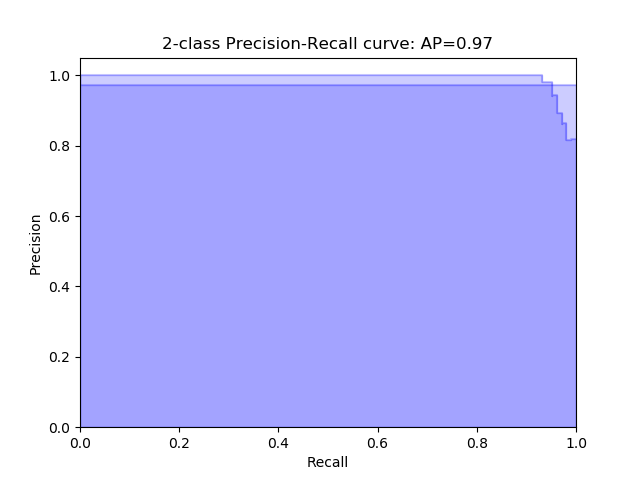

Text(0.5,1,'2-class Precision-Recall curve: AP=0.99')

In [46]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Boosted tree

In [47]:
#XGBoost is an implementation of gradient boosted decision trees
import xgboost as xgb

In [48]:
model_xgboost = xgb.XGBClassifier() # boosted tree classifire
model_xgboost.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
#predicting the accuracy of classifier

pred = model_xgboost.predict(X_test)
print(accuracy_score(pred,y_test))

0.979865771812


In [50]:
#confusion matrix for measuring the performance of classifier
confusion_matrix(y_test,pred)

array([[ 43,   3],
       [  0, 103]])

In [51]:
#F-Measure of Boosted Tree
print(f1_score(y_test,pred,average='binary'))

0.985645933014


In [52]:
#Precision score of Boosted tree
print(precision_score(y_test,pred,average='binary'))

0.971698113208


In [53]:
print(recall_score(y_test,pred,average='binary'))

1.0


In [54]:
average_precision = average_precision_score(y_test,pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.97


In [55]:
precision, recall, _ = precision_recall_curve(y_test,pred )

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Text(0.5,1,'2-class Precision-Recall curve: AP=0.97')

# Analysis of effect Reduce the dimension of feature and compare between SVM and Boosted Tree


In [56]:
# Total selected features is 3000

In [57]:
v= np.arange(10,3005,300)
sample = sorted(v,reverse=True)
sample

[2710, 2410, 2110, 1810, 1510, 1210, 910, 610, 310, 10]

In [58]:
svmAc  = []
boostAcc = []
for i in tqdm(sample):
    redu = dimensionReduction(i)
    X = np.array(redu)
    y = np.array(trData['lable'].astype('int'))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
    clf.fit(X_train, y_train)
    result1 = clf.predict(X_test)
    svmAc.append(accuracy_score(y_test,result1))
    model_xgboost.fit(X_train,y_train) 
    pred = model_xgboost.predict(X_test)
    boostAcc.append(accuracy_score(pred,y_test))

100%|██████████| 10/10 [00:25<00:00,  1.71s/it]


In [59]:
#ploting the graph of accuracy change by reducing the dimension/feature
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='chandu9523', api_key='M3OD0OVnLJOjy71qbS1P')

In [60]:
#SPECIFYING THE LABEL OF THE GRAPH AND THE LAYOUT OF THE GRAPH AND THE TITLE OF THE GRAPH
trace1 = go.Bar(
    x = sample,
    y = svmAc,
    name='SVM_acc'
)
trace2 = go.Bar(
    x = sample,
    y = boostAcc,
    name='Boost_acc'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Accuracy_Changes_by_reduce_the_feature',
    xaxis=dict(
        title='No_of_feature',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Accuracy',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Accuracy_Changes_by_reduce_the_feature')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~chandu9523/0 or inside your plot.ly account where it is named 'Accuracy_Changes_by_reduce_the_feature'
